
# Customer Segmentation using Clustering

This notebook aims to segment customers into distinct groups based on their behavior and attributes. This can help in understanding customer patterns, which is useful for targeted marketing, recommendation systems, and customer retention strategies.

**Steps Covered:**
1. Data Loading & Exploration
2. Data Preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature Scaling
5. Clustering using KMeans
6. Evaluation using Elbow Method & Silhouette Score
7. Dimensionality Reduction and Visualization
8. Cluster Profiling and Exporting Results


## Step 1: Import Required Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')


## Step 2: Load the Dataset

In [2]:

df = pd.read_csv('./data/new (1).csv')
print(f"Shape of dataset: {df.shape}")
df.head()


Shape of dataset: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Step 3: Data Overview

In [3]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [4]:
parts = df["Dt_Customer"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')

In [5]:
df.drop(['ID','Z_CostContact', 'Z_Revenue', 'Dt_Customer'],
        axis=1,
        inplace=True)

## Step 4: Check for Missing Values

In [6]:

df.isnull().sum()


Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
day                     0
month                   0
year                    0
dtype: int64

In [7]:
df = df.dropna()
print("Total values in the dataset after removing the null values:", len(df))

Total values in the dataset after removing the null values: 2216


## Step 5: Exploratory Data Analysis (EDA)

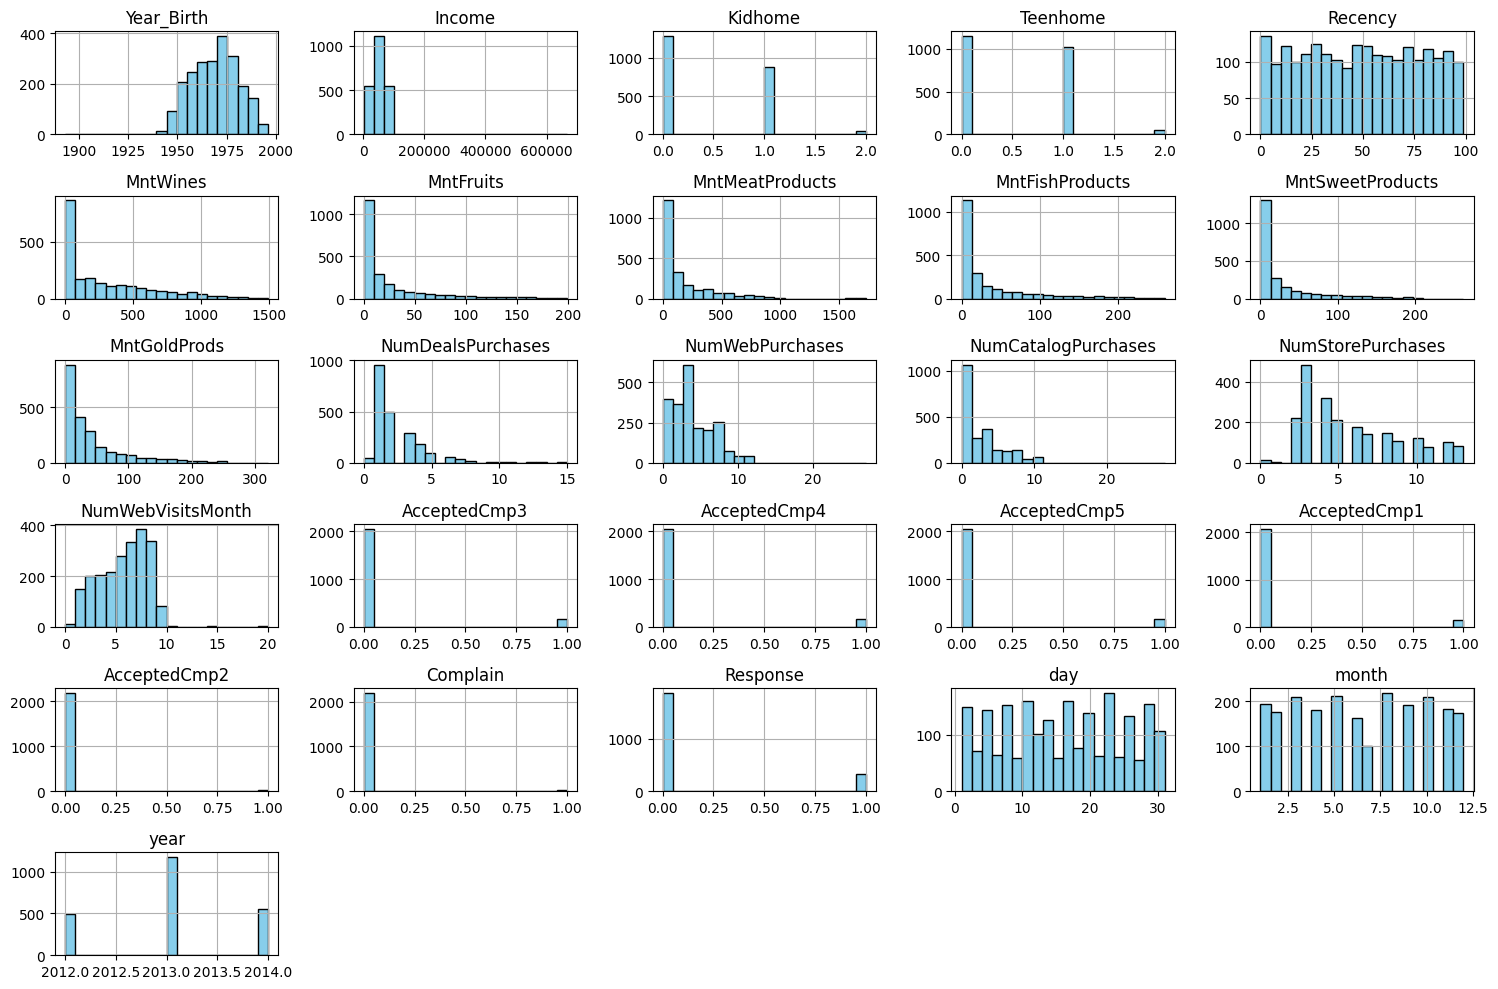

In [8]:

df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


In [9]:
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

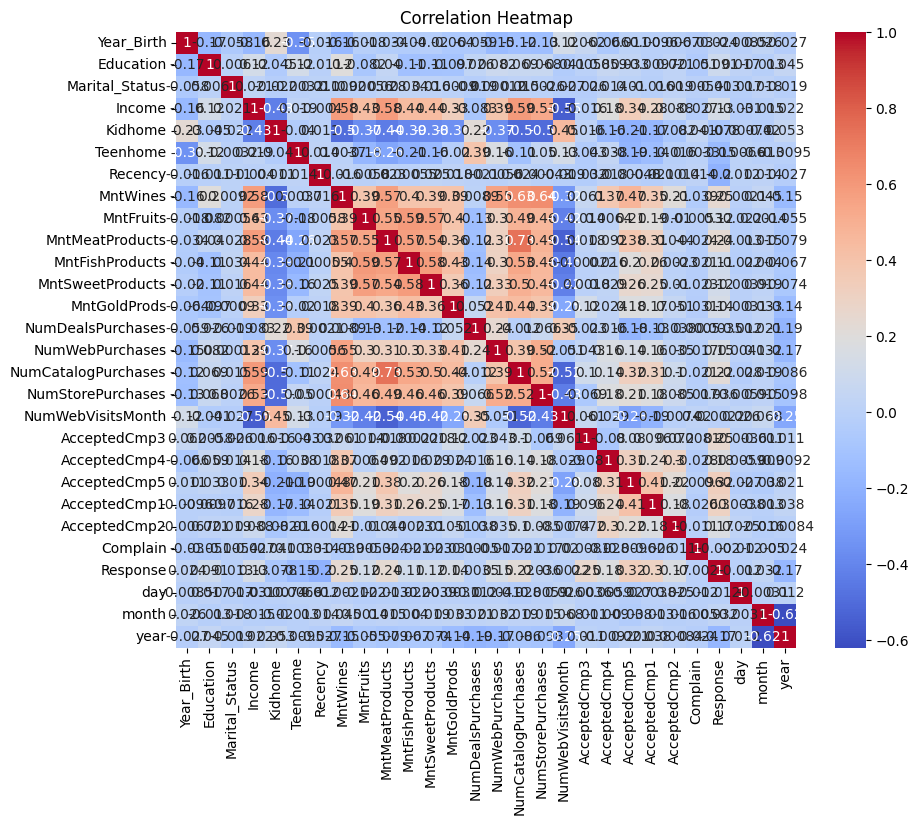

In [10]:

plt.figure(figsize=(10, 8))
#numeric_df = df.select_dtypes(include=[np.number])
sb.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Step 6: Feature Scaling

In [11]:

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


## Step 7: Find Optimal Clusters using Elbow Method

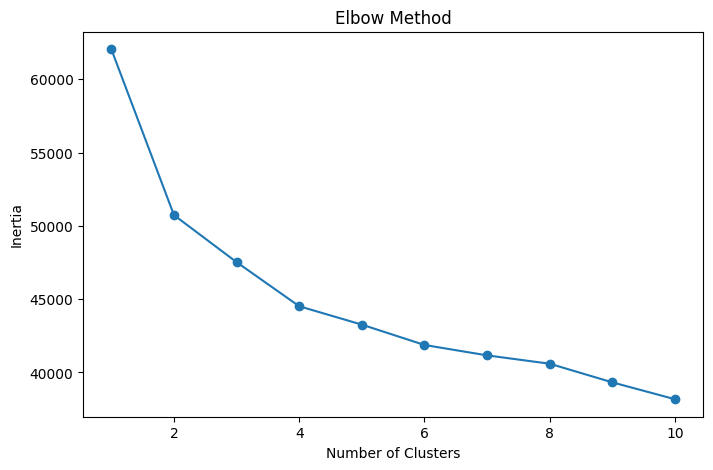

In [12]:

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


## Step 8: Clustering using KMeans

In [30]:

k = 4 # Based on elbow plot or manually updated
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

df['Cluster'] = clusters
print(f"Silhouette Score: {silhouette_score(scaled_df, clusters):.3f}")
df['Cluster'].value_counts()


Silhouette Score: 0.144


Cluster
0    1005
3     593
1     449
2     169
Name: count, dtype: int64

## Step 9: t-SNE Visualization of Clusters

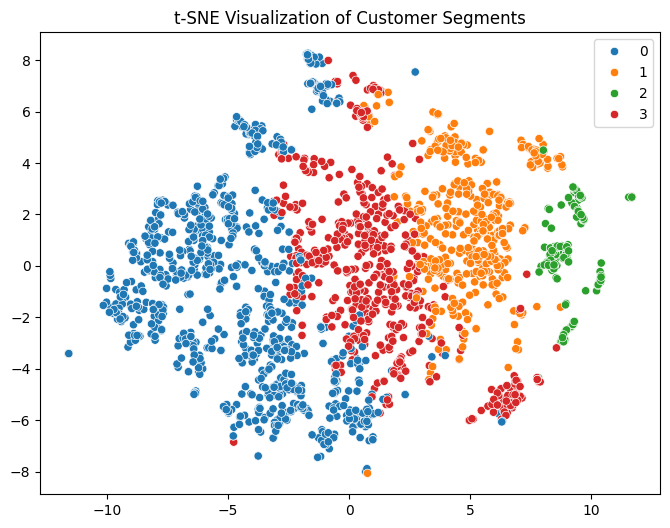

In [31]:

tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_results = tsne.fit_transform(scaled_df)

plt.figure(figsize=(8, 6))
sb.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=clusters, palette='tab10')
plt.title("t-SNE Visualization of Customer Segments")
plt.show()


## Step 10: Cluster Profiling

In [32]:

# Select only numeric columns for profiling
numeric_cols = df.columns
cluster_profile = df.groupby('Cluster')[numeric_cols].mean()
cluster_profile


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,day,month,year,Cluster,DBSCAN_Cluster,Agglo_Cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1971.897512,2.256716,3.710448,34650.863682,0.800995,0.433831,49.236816,39.168159,5.033831,22.970149,...,0.000000,0.001990,0.012935,0.090547,15.678607,6.207960,2013.142289,0.0,-0.808955,1.788060
1,1967.853007,2.291759,3.797327,74121.518931,0.046771,0.233853,49.456570,490.363029,71.984410,428.832962,...,0.111359,0.000000,0.006682,0.169265,15.532294,6.552339,2013.008909,1.0,-1.000000,0.158129
2,1969.396450,2.514793,3.733728,81926.739645,0.053254,0.130178,49.568047,876.810651,55.532544,469.053254,...,0.443787,0.124260,0.005917,0.579882,14.881657,6.023669,2013.059172,2.0,-1.000000,0.035503
3,1964.173693,2.669477,3.696459,57048.246206,0.242833,0.939292,48.138280,452.554806,19.629005,126.748735,...,0.028668,0.011804,0.006745,0.114671,15.922428,6.961214,2012.841484,3.0,-1.000000,0.951096


## Step 11: Clustering using DBSCAN

In [33]:


dbscan = DBSCAN(eps=1.5, min_samples=5)
db_clusters = dbscan.fit_predict(scaled_df)

df['DBSCAN_Cluster'] = db_clusters
print(df['DBSCAN_Cluster'].value_counts())


DBSCAN_Cluster
-1    2145
 2      35
 1      16
 0      10
 3       5
 4       5
Name: count, dtype: int64


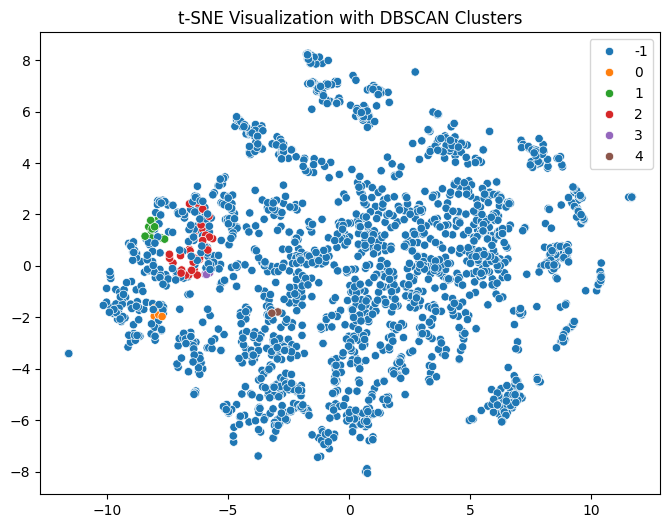

In [34]:

plt.figure(figsize=(8, 6))
sb.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=db_clusters, palette='tab10')
plt.title("t-SNE Visualization with DBSCAN Clusters")
plt.show()

## Step 12: Clustering using Agglomerative Clustering

In [35]:

agglo = AgglomerativeClustering(n_clusters=3)
agglo_clusters = agglo.fit_predict(scaled_df)

df['Agglo_Cluster'] = agglo_clusters
print(df['Agglo_Cluster'].value_counts())

Agglo_Cluster
2    867
1    704
0    645
Name: count, dtype: int64


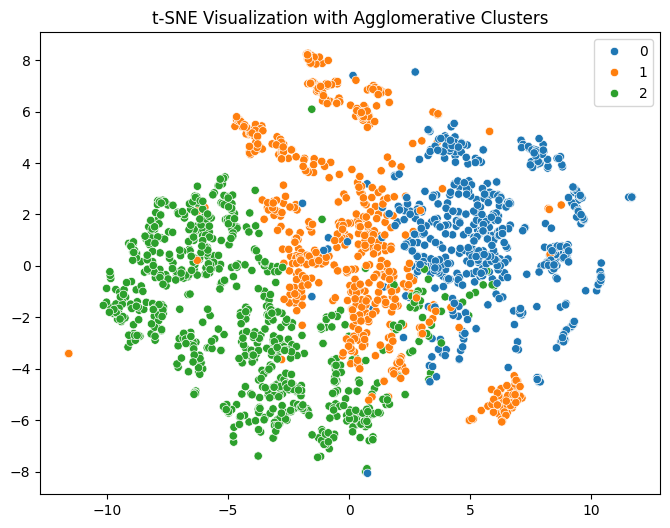

In [36]:
plt.figure(figsize=(8, 6))
sb.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=agglo_clusters, palette='tab10')
plt.title("t-SNE Visualization with Agglomerative Clusters")
plt.show()

## Step 13: Export Clustered Data

In [ ]:

#df.to_csv('./data/clustered_customers.csv', index=False)
#print("Clustered data exported successfully.")
